In [ ]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/Machine Learning ASM/bank_transactions.csv')

In [ ]:
#Load dataset from local
#df = pd.read_csv('bank_transactions.csv')

In [ ]:
df.shape

(1048567, 9)

In [ ]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [ ]:
df.tail()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0
1048566,T1048567,C8337524,5/3/84,M,PUNE,75734.42,18/9/16,181222,1166.0


In [ ]:
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [ ]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [ ]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

# Data Preproccessing

1.   Missing Data: Identify and handle missing data.
2.   Outliers: Detect and address outliers.
3. Contaminated Data: Look for any unrealistic or incorrect data.
3.   Inconsistent Data: Check for inconsistencies in categorical data (e.g., different labels meaning the same thing).
4.   Invalid Data: Validate formats (especially for dates and times).
5.   Duplicate Data: Identify and remove duplicates.
6.   Data Type Issues: Ensure each column is of the correct data type.
7.   Structural Errors: Fix any structural problems (e.g., values in wrong columns).



**1. Missing Data**

In [ ]:
# Check for missing data
missing_data = df.isnull().sum()
missing_data_percentage = (missing_data / len(df)) * 100

missing_data_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percentage})
missing_data_summary

,Missing Values,Percentage
TransactionID,0,0.000000
CustomerID,0,0.000000
CustomerDOB,3397,0.323966
CustGender,1100,0.104905
CustLocation,151,0.014401
CustAccountBalance,2369,0.225927
TransactionDate,0,0.000000
TransactionTime,0,0.000000
TransactionAmount (INR),0,0.000000


The dataset has missing values in the following columns:

1. CustomerDOB: 3,397 missing values (0.32%)
1. CustGender:  1,100 missing values (0.10%)
1. CustLocation:151 missing values (0.01%)
1. CustAccountBalance:2,369 missing values (0.23%)

We dicide handle these missing values by filling in the missing values with a default value (e.g., the mean or median for numerical columns, or a placeholder like "Unknown" for categorical columns).

In [ ]:
# Fill in missing values
df['CustomerDOB'].fillna('Unknown', inplace=True)  # Placeholder for categorical/text data
df['CustGender'].fillna('Unknown', inplace=True)  # Placeholder for categorical/text data
df['CustLocation'].fillna('Unknown', inplace=True)  # Placeholder for categorical/text data
df['CustAccountBalance'].fillna(df['CustAccountBalance'].mean(), inplace=True)  # Mean for numerical data

# Check if the missing values have been filled
df.isnull().sum()


TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

CustomerDOB, CustGender, and CustLocation were filled with the placeholder "Unknown".

CustAccountBalance was filled with the mean value of its column.

**2. Outliers**

In [ ]:
# Detecting outliers using IQR (Interquartile Range) #https://builtin.com/articles/1-5-iqr-rule
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Outliers for CustAccountBalance
outliers_account_balance, lb_account_balance, ub_account_balance = detect_outliers(df, 'CustAccountBalance')

# Outliers
# Outliers for TransactionAmount (INR)
outliers_transaction_amount, lb_transaction_amount, ub_transaction_amount = detect_outliers(df, 'TransactionAmount (INR)')

# Summary of outliers
outliers_summary = {
    'CustAccountBalance': [outliers_account_balance.shape[0], lb_account_balance, ub_account_balance],
    'TransactionAmount (INR)': [outliers_transaction_amount.shape[0], lb_transaction_amount, ub_transaction_amount]
}

outliers_summary_df = pd.DataFrame(outliers_summary, index=['Number of Outliers', 'Lower Bound', 'Upper Bound'])
outliers_summary_df


,CustAccountBalance,TransactionAmount (INR)
Number of Outliers,139723.00,112134.0
Lower Bound,-75459.01,-1397.5
Upper Bound,138405.55,2758.5


These outliers represent values that fall outside the "normal" range (defined here as 1.5 times the interquartile range above or below the first and third quartiles, respectively). We decide remove these outliers from the dataset

In [ ]:
# Remove outliers from the dataset
df_clean = df[
    (df['CustAccountBalance'] >= lb_account_balance) &
    (df['CustAccountBalance'] <= ub_account_balance) &
    (df['TransactionAmount (INR)'] >= lb_transaction_amount) &
    (df['TransactionAmount (INR)'] <= ub_transaction_amount)
]

# Number of rows before and after outlier removal
rows_before = df.shape[0]
rows_after = df_clean.shape[0]
rows_removed = rows_before - rows_after

"Rows before: ",rows_before,"Rows after: ", rows_after,"Rows removed: ", rows_removed


('Rows before: ', 1048567, 'Rows after: ', 827120, 'Rows removed: ', 221447)

**3. Contaminated Data**

This refers to data that is unrealistic or incorrect but not identified as missing or an outlier. Examples include negative values for CustAccountBalance or TransactionAmount (INR) where they don't make sense, or impossible dates in CustomerDOB or TransactionDate.

In [ ]:
# Check for negative values in columns where it doesn't make sense
negative_values = {
    'CustAccountBalance': df_clean[df_clean['CustAccountBalance'] < 0].shape[0],
    'TransactionAmount (INR)': df_clean[df_clean['TransactionAmount (INR)'] < 0].shape[0]
}

from datetime import datetime

# Make sure 'CustomerDOB' is in string format for manipulation
df_clean['CustomerDOB'] = df_clean['CustomerDOB'].astype(str)

# Define a function to correct the year based on your criteria
def correct_year(dob_str):
    # Split the date assuming the format is 'dd-mm-yyyy' or 'dd-mm-yy'; adjust if different
    parts = dob_str.split('/')

    if len(parts) == 3:  # Ensure it's a complete date
        year = parts[2]

        if len(year) == 2:  # Two-digit year
            year = f'19{year}' if int(year) > 24 else f'20{year}'
        elif len(year) == 4 and int(year) > 2024:  # Misinterpreted future year
            year = f'19{year[-2:]}'
        # Reconstruct the date string
        corrected_dob_str = f'{parts[0]}-{parts[1]}-{year}'
        return corrected_dob_str
    return dob_str  # Return original if it doesn't match expected format


# Apply the correction
df_clean['CustomerDOB'] = df_clean['CustomerDOB'].apply(correct_year)

# Check for invalid dates (Already taken care as part of outliers, but double-checking for format)
# Convert dates to datetime format, invalid entries will become NaT (not a time), count them if any
try:
    df_clean['CustomerDOB'] = pd.to_datetime(df_clean['CustomerDOB'], errors='coerce')
    df_clean['TransactionDate'] = pd.to_datetime(df_clean['TransactionDate'], errors='coerce')
except:
    pass  # If conversion fails, skip (just for safety in batch processing)


# Set 'CustomerDOB' to NaT where the year from 'CustomerDOB' is 1800
df_clean.loc[df_clean['CustomerDOB'].dt.year == 1800, 'CustomerDOB'] = pd.NaT

invalid_dates = {
    'CustomerDOB': df_clean[df_clean['CustomerDOB'].isna()].shape[0],
    'TransactionDate': df_clean[df_clean['TransactionDate'].isna()].shape[0]
}

negative_values, invalid_dates

# Replace invalid CustomerDOB entries with 'Unknown'
df_clean['CustomerDOB'] = df_clean['CustomerDOB'].fillna('Unknown')

# Check again to ensure no invalid dates remain
df_clean['CustomerDOB'].isnull().sum()

0

CustAccountBalance: There are no negative values, which is appropriate since account balances should not be negative.

TransactionAmount (INR): There are no negative values, which is correct as transaction amounts should be non-negative.

TransactionDate: There are no invalid dates, which is good.

We only found the issue with column CustomerDOB. For the CustomerDOB with invalid dates, we replace them with a placeholder like 'Unknown'

In [ ]:
# Replace invalid CustomerDOB entries with 'Unknown'
df_clean['CustomerDOB'] = df_clean['CustomerDOB'].fillna('Unknown')

# Check again to ensure no invalid dates remain
df_clean['CustomerDOB'].isnull().sum()


0

**4. Inconsistent Data**

We need to check for inconsistencies in categorical data, such as different labels meaning the same thing (e.g., "male", "Male", and "M" in the CustGender column).

In [ ]:
# Check for inconsistencies in categorical data
unique_genders = df_clean['CustGender'].unique()
unique_locations = df_clean['CustLocation'].unique()

unique_genders, unique_locations


(array(['F', 'M', 'Unknown'], dtype=object),
 array(['JAMSHEDPUR', 'MUMBAI', 'NAVI MUMBAI', ...,
        'SHIVSHAHI PRAKALP MUMBAI', 'THIRUVOTTIYUR', 'KARANJIA'],
       dtype=object))

The CustGender column appears consistent with three unique values:
* "F" (likely representing female)
* "M" (likely representing male)
* "Unknown" (used as a placeholder for missing data)

The CustLocation column has a variety of unique values, which seems expected due to the nature of location data; however, due to the vast number of unique locations, manual inspection for inconsistencies might be impractical here. We would typically look for variations in spelling or formatting, but without specific issues to target, we would generally leave these as is unless you have specific concerns.

**5. Duplicate Data**

In [ ]:
# Check for and remove duplicate rows
duplicate_rows = df_clean.duplicated().sum()
df_clean = df_clean.drop_duplicates()

# Number of duplicate rows found and removed
duplicate_rows


0

There were no duplicate rows found in the dataset. Hence, no rows were removed due to duplication.

**6. Data Type Issues**

In [ ]:
# Check current data types
current_data_types = df_clean.dtypes

# Convert data types if necessary
# TransactionID and CustomerID are likely intended to be categorical (despite being IDs).
# CustomerDOB and TransactionDate should be of datetime type, but we've handled invalid dates with 'Unknown', making them strings.
# CustGender and CustLocation are categorical.
# CustAccountBalance and TransactionAmount (INR) should be numerical.

# Convert necessary columns to categorical
df_clean['TransactionID'] = df_clean['TransactionID'].astype('category')
df_clean['CustomerID'] = df_clean['CustomerID'].astype('category')
df_clean['CustGender'] = df_clean['CustGender'].astype('category')
df_clean['CustLocation'] = df_clean['CustLocation'].astype('category')

# After conversion, check data types again
updated_data_types = df_clean.dtypes

current_data_types, updated_data_types


(TransactionID                      object
 CustomerID                         object
 CustomerDOB                        object
 CustGender                         object
 CustLocation                       object
 CustAccountBalance                float64
 TransactionDate            datetime64[ns]
 TransactionTime                     int64
 TransactionAmount (INR)           float64
 dtype: object,
 TransactionID                    category
 CustomerID                       category
 CustomerDOB                        object
 CustGender                       category
 CustLocation                     category
 CustAccountBalance                float64
 TransactionDate            datetime64[ns]
 TransactionTime                     int64
 TransactionAmount (INR)           float64
 dtype: object)

All necessary columns have been converted to the appropriate data types.

# EDA

**1. Distribution of Account Balances Among Customers:**

This question aims to understand how the account balances are distributed, whether most customers have low, medium, or high balances, and to identify any outliers in account balances.

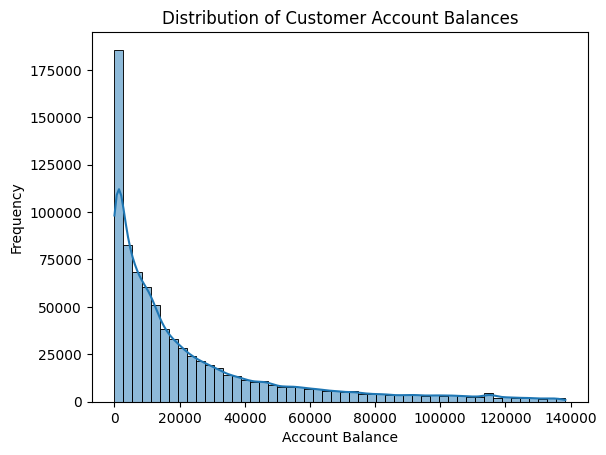

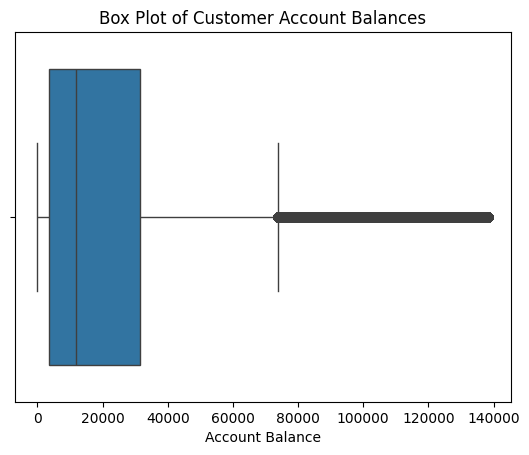

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for account balance distribution
sns.histplot(df_clean['CustAccountBalance'], bins=50, kde=True)
plt.title('Distribution of Customer Account Balances')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()

# Box plot for account balance to spot outliers
sns.boxplot(x=df_clean['CustAccountBalance'])
plt.title('Box Plot of Customer Account Balances')
plt.xlabel('Account Balance')
plt.show()


These plots will help us to understand the distribution of account balances and identify any outliers. The histogram displays the frequency of various account balance ranges, while the box plot highlights the median, quartiles, and outliers.

The first image provided is a histogram with a kernel density estimate (KDE) overlaid on it, showing the distribution of customer account balances. From this graph, we can observe the following:

1. Skewed Distribution: The distribution of account balances is highly right-skewed, meaning most of the customers have lower account balances, while only a few customers have high account balances.

2. Common Range: The majority of account balances seem to fall below 20,000 INR, as indicated by the high frequency (height of the bars) in this range.

3. Long Tail: There is a long tail extending to the right, indicating that there are a small number of customers with very high account balances, up to 140,000 INR.

The second image is a box plot of customer account balances. From this graph, we can deduce:

1. Median: The line inside the box represents the median account balance, which appears to be slightly below 20,000 INR, aligning with the distribution seen in the histogram.

2. Interquartile Range (IQR): The box represents the interquartile range (from Q1 to Q3), showing where the middle 50% of data points lie. This range is quite narrow, indicating that half of the customer account balances are concentrated within a small range.

3. Outliers: The points and lines extending from the box represent outliers and the range of the data. The long line extending to the right shows that there are account balances that are much higher than the median and even the upper quartile, which aligns with the long tail seen in the histogram.

4. Asymmetry in the Data: The length of the whisker on the right (the line extending from the box) is much longer than the one on the left, reinforcing the right-skewed nature of the distribution seen in the histogram.

Overall, these graphs indicate that while the majority of customers have lower account balances, there are a few customers with very high balances, which significantly skews the distribution.

**2. Differences in Account Balances Across Different Genders:**

This explores whether there's a gender disparity in the financial data.

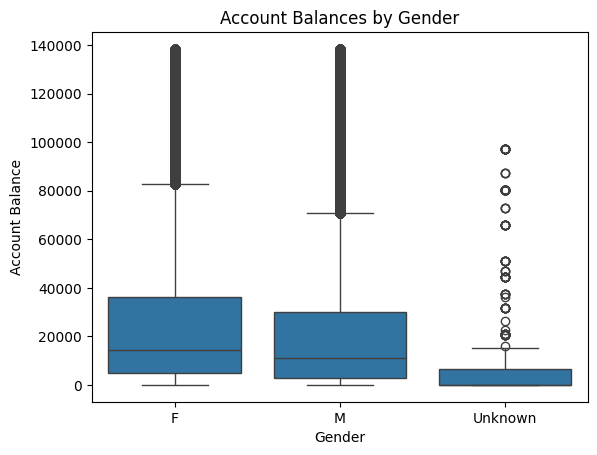

In [ ]:
sns.boxplot(x='CustGender', y='CustAccountBalance', data=df_clean)
plt.title('Account Balances by Gender')
plt.xlabel('Gender')
plt.ylabel('Account Balance')
plt.show()


This box plot is to compare the distribution of account balances between different genders, helping identify any disparities.

The box plot shows the distribution of customer account balances segmented by gender categories: Female (F), Male (M), and Unknown.

1. Median: For each gender, the line inside the box represents the median account balance. It appears that the median balance is similar for both Female and Male categories and significantly lower for the Unknown category.

2. Interquartile Range (IQR): The box shows where the middle 50% of values fall (from the first quartile, Q1, to the third quartile, Q3). The IQR for both Female and Male categories are somewhat similar, suggesting that the central 50% of the balances within these groups are spread over a similar range. However, the IQR for the Unknown gender category is much smaller, indicating that account balances in this category are more tightly clustered around the median.

3. Whiskers: The lines extending from the boxes indicate the range for the majority of the remaining data, not considered outliers. The range seems comparable for Female and Male categories but is notably smaller for the Unknown category, reflecting less variation in account balances.

4. Outliers: The circles represent outlier values that fall outside the range defined by the whiskers. For Female and Male categories, there are several outliers, suggesting that there are individuals with significantly higher account balances than the typical customer. The Unknown category has a high number of outliers at the lower end, indicating many accounts with small balances that are distinct from the main group.

5. Overall Distribution: The distributions for Female and Male categories show that while most customers have account balances within a similar range, there are a few with much higher balances. The Unknown category, on the other hand, mostly consists of lower account balances, with very few high-balance accounts.

In summary, while the median account balances for Female and Male customers are similar, both groups display a significant number of high-value outliers. The Unknown category, however, shows a tighter distribution with mainly lower account balances.

**3. Relationship Between Account Balance and Transaction Amount:**

Investigates whether customers with higher account balances tend to make larger transactions.

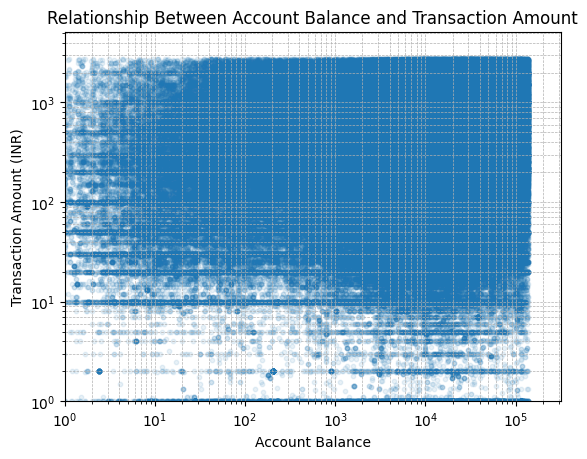

In [ ]:
plt.scatter(df_clean['CustAccountBalance'], df_clean['TransactionAmount (INR)'],
            alpha=0.1,  # Adjust transparency here
            s=10)       # Adjust size here
plt.title('Relationship Between Account Balance and Transaction Amount')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount (INR)')
plt.xscale('log')  # Apply log scale to the x-axis
plt.yscale('log')  # Apply log scale to the y-axis
plt.xlim(left=1)   # Set the lower limit to avoid log(0)
plt.ylim(bottom=1) # Set the lower limit to avoid log(0)
plt.grid(True, which="both", ls="--", linewidth=0.5)  # Add grid for better readability
plt.show()


This graph displays the relationship between account balances and transaction amounts for customers, using logarithmic scales for both the x-axis (Account Balance) and the y-axis (Transaction Amount).

Here's how to interpret the graph:

1. Logarithmic Scales: Both axes are logarithmic, meaning each increment represents an exponential increase in value. This type of scale is useful for data that spans many orders of magnitude, as it allows for easier visualization of wide-ranging values.

2. Data Density: The graph shows a high density of data points at the lower end of both scales. This indicates that most customers have lower account balances and engage in transactions of smaller amounts.

3. Spread of Data: The data points are spread across a wide range of values on both axes, but there is no clear, consistent pattern indicating a strong relationship between account balance size and transaction amount.

4. Clusters and Patterns: There are noticeable clusters of data points at lower transaction amounts and account balances, indicating that a significant portion of the customer base conducts smaller transactions, regardless of their account balance.

5. High Account Balances: For customers with higher account balances (right side of the graph), there is still a broad range of transaction amounts, indicating that even customers with substantial account balances often make smaller transactions.

6. Lack of Direct Correlation: Despite the wide range of account balances and transaction amounts, there isn't a discernible linear relationship where higher account balances correlate with higher transaction amounts. This means that having a higher balance does not necessarily lead to larger transactions.

7. Variability Across Account Sizes: Customers with similar account balances can have vastly different transaction behaviors, and likewise, similar transaction amounts can come from customers with vastly different account balances.

In summary, while the graph shows data across a wide spectrum of account balances and transaction amounts, it does not demonstrate a clear, direct relationship between the size of a customer's account balance and the amount they transact. Instead, it shows variability and diversity in customer behavior across different account balances.

This scatter plot will visualize the relationship between account balances and transaction amounts, indicating whether higher account balances correspond to larger transactions.

**4. Age Demographics and Their Relation to Account Balance:**

This aims to explore if there is a correlation between the age of customers and their account balances.

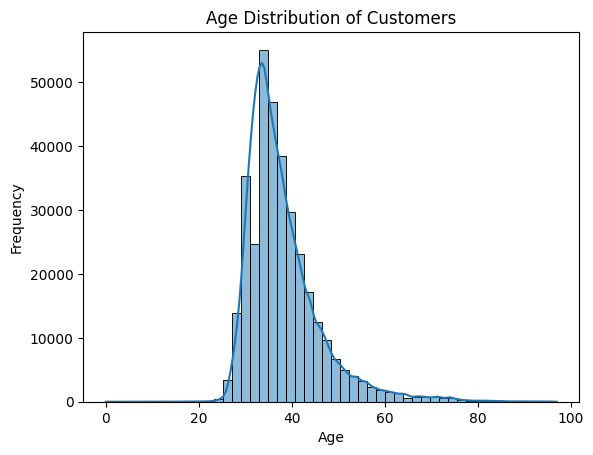

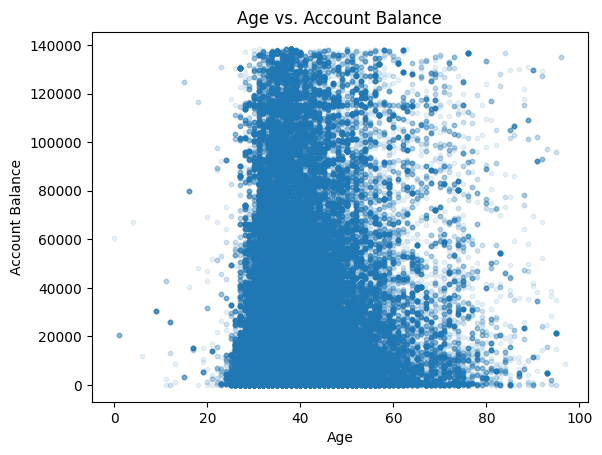

In [ ]:
from datetime import datetime

# Assuming 'CustomerDOB' has been converted to datetime format; if not, do that first.
# Calculate age from 'CustomerDOB'

current_year = datetime.now().year
df_clean['CustomerDOB']=pd.to_datetime(df_clean['CustomerDOB'],errors='coerce')
df_clean['Age'] = current_year - df_clean['CustomerDOB'].dt.year

# Histogram for age distribution
sns.histplot(df_clean['Age'], bins=50, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Scatter plot to see the relationship between age and account balance
plt.scatter(df_clean['Age'], df_clean['CustAccountBalance'],alpha=0.1,s=10)
plt.title('Age vs. Account Balance')
plt.xlabel('Age')
plt.ylabel('Account Balance')
plt.show()


These will understand the age distribution of the customers and any relationship between age and account balance.

1. Age Distribution of Customers:

  - Main Findings: This histogram shows the age distribution of the customer base. Most customers are in their 20s and 30s, as shown by the peak in the histogram. The frequency gradually decreases for older age groups.

  - Shape of Distribution: The distribution is right-skewed, meaning there are more younger customers than older ones.

  - Youth Dominance: The largest age group among the customers is the young adult demographic, highlighting a potentially tech-savvy or younger market segment.

  - Older Customers: While there are customers in the older age ranges, they make up a smaller portion of the overall customer base.

2. Age vs. Account Balance:

  - Distribution Pattern: This scatter plot illustrates how account balances vary across different ages. Despite the spread, there is no clear upward or downward trend connecting age with account balance. This indicates that age may not be a determining factor in the size of account balances.

  - Younger Customers' Balances: Younger customers (below 40) display a wide range of account balances, from very low to relatively high. However, most younger customers seem to have lower to moderate account balances.

  - Older Customers' Balances: For older customers, while the distribution is sparser, it similarly spans a wide range, suggesting variability in account balances independent of age.

  - High Account Balances: High account balances are scattered across all age groups but do not show a tendency to increase with age. Similarly, low account balances are prevalent across all ages.

  - Cluster Patterns: There is a dense cluster of data points at the lower end of the account balance range, indicating that a significant number of customers of various ages maintain lower account balances.

Overall Interpretation: The age distribution shows a young customer demographic, with a significant decrease in frequency as age increases. The relationship between age and account balance, however, shows no clear pattern, indicating that while the customer base might skew younger, account balances do not necessarily increase with customer age. This suggests that factors other than age might be more influential in determining the size of a customer's account balance.

**5. Transaction Activity Over Time:**

Identifies trends in transaction times and dates to understand customer behavior better.

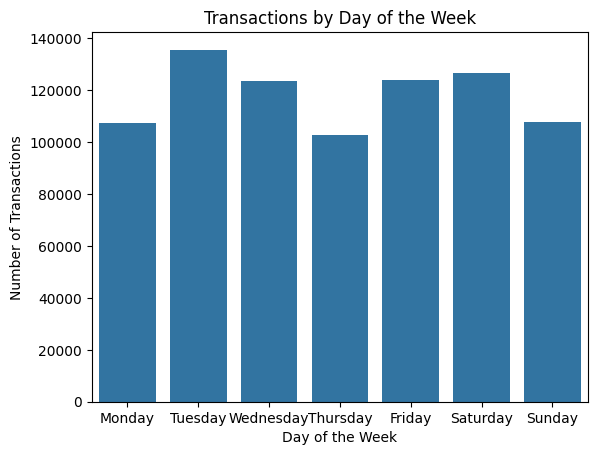

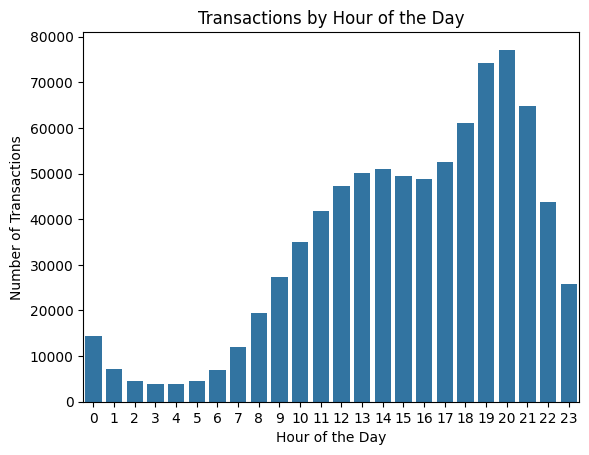

In [ ]:
# Convert 'TransactionDate' to datetime if not already
df_clean['TransactionDate'] = pd.to_datetime(df_clean['TransactionDate'])

# Extract day of week and hour for transactions
df_clean['TransactionDay'] = df_clean['TransactionDate'].dt.day_name()
df_clean['TransactionHour'] = df_clean['TransactionTime'] // 10000  # Assuming 'TransactionTime' is in HHMMSS format

# Countplot for days
sns.countplot(x='TransactionDay', data=df_clean, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()

# Countplot for hours
sns.countplot(x='TransactionHour', data=df_clean)
plt.title('Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()


These visualizations is the distribution of transactions throughout the week and across different hours of the day.

These two graphs provide insights into the transaction patterns of customers by day of the week and hour of the day.

1. Transactions by Day of the Week:

  - Weekday Activity: The bar chart shows that transaction activity is higher on weekdays, with Tuesday being the peak day for transactions, followed closely by Monday and Wednesday.

  - Weekend Drop: There is a noticeable drop in transaction numbers during the weekend, with Saturday and especially Sunday having fewer transactions compared to weekdays. This could reflect typical business hours and customer habits, where people are more likely to take care of banking transactions during the workweek.

  - Midweek Consistency: From Monday to Thursday, transaction numbers remain relatively high and consistent, suggesting regular banking activity during these days.

2. Transactions by Hour of the Day:

  - Morning Activity: Transaction activity starts low in the early hours of the day, from midnight to early morning, which is expected since these are not typical banking hours.

  - Increase in Activity: There is a gradual increase in transactions starting from around 8 AM, with activity steadily rising as the day progresses.

  - Peak Hours: Transaction activity peaks in the late afternoon and evening, between 1 PM and 8 PM, with the highest number of transactions typically occurring around 6 PM to 7 PM. This could reflect people conducting transactions after work hours.

  - Evening Decline: After the peak hours, there is a sharp decline in transactions as the night progresses, aligning with typical non-business hours.

Overall, the data indicates that customers tend to engage in banking transactions primarily during typical business hours on weekdays, with the highest activity in the mid to late afternoon. Weekends, especially Sundays, and late night to early morning hours see significantly fewer transactions, reflecting common work schedules and lifestyle patterns.

# Modelling

In [ ]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score




***K-Means***   
n=5

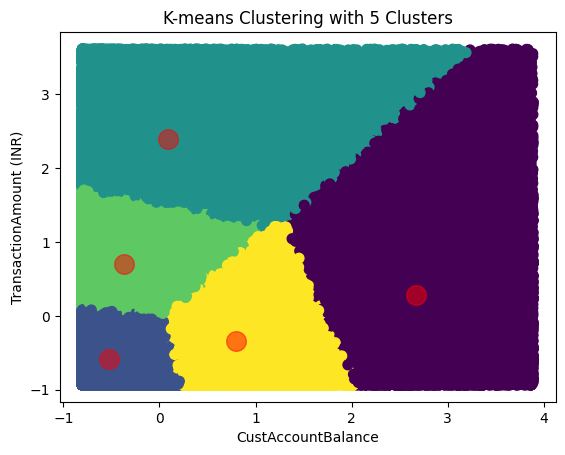

In [ ]:

features = df_clean[['CustAccountBalance', 'TransactionAmount (INR)']]

# Standardize features

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features_scaled)

# The cluster labels for each data point
clusters = kmeans.labels_



y_kmeans = kmeans.predict(features_scaled);
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('K-means Clustering with 5 Clusters')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.show()

The graph presented is a visual representation of a K-means clustering model's results. K-means is a popular unsupervised machine learning algorithm used to identify clusters within data. The algorithm partitions the data into K number of clusters, where each data point belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

In this case, the graph shows data that has been standardized and then clustered into five distinct groups, as indicated by the different colors—each color represents a different cluster. The standardization process is important because it ensures that each feature contributes equally to the result, avoiding any bias that could come from the scale of the features.

The clusters seem to be well-defined and mostly non-overlapping, which suggests that the K-means algorithm was able to find a structure in the data where each cluster is distinct from the others.

The red dots represent the centroids of the clusters—these are the 'mean' points for each cluster, which is what the K-means algorithm calculates in order to define the clusters. These centroids are the points around which the data points in each cluster are the most densely packed. In the K-means algorithm, the centroids are initially assigned randomly, and then the algorithm iteratively updates them to the mean of the points in their cluster until the centroids no longer change significantly, which means the model has converged.

From the plot, it appears that the clusters have a relatively clear separation, and the centroids are centrally located within their respective clusters. This would indicate that the K-means algorithm has done a good job in identifying and separating the clusters in the dataset.

The silhouette of the clusters, or how well they are separated from each other, appears to be fairly well defined. In a good clustering, the silhouette would be as close to 1 as possible, meaning there is good separation and the points within a cluster are close to each other. If the clusters were overlapping significantly or the points within a cluster were scattered very far from the centroid, it would suggest that K-means might not be the best model for this data or that the number of clusters (n=5) might not be the optimal choice.

Lastly, the use of the 'viridis' colormap gives a clear visual distinction between the clusters, helping in visually assessing the performance of the clustering. However, for a complete evaluation, one would typically also compute the silhouette score, check the inertia (within-cluster sum of squares), and possibly perform a more qualitative analysis of the clusters to understand if they make sense in the context of the problem domain.

***K-Means***  
  n=10

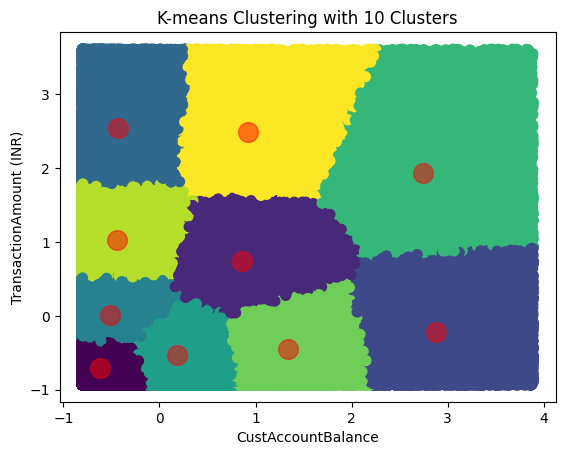

In [ ]:
# K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(features_scaled)

# The cluster labels for each data point
clusters = kmeans.labels_



y_kmeans = kmeans.predict(features_scaled);
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('K-means Clustering with 10 Clusters')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.show()

Feature 1 and Feature 2 have been standardized to have a mean of zero and a standard deviation of one. This standardization allows the K-means algorithm to treat both features equally when calculating distances between data points and centroids.

The boundaries between clusters show where the algorithm has determined the division between groups based on the smallest variance within each cluster and the largest variance between clusters. The clusters are relatively distinct and seem to have little overlap, which may indicate a good clustering by the algorithm.

However, there are some regions where the clustering boundaries seem jagged, especially between the yellow and green clusters, and the blue and purple clusters. This might suggest that data points near these boundaries were closer in distance to multiple centroids, making the assignment less clear-cut.

***K-Means***  
  n=25

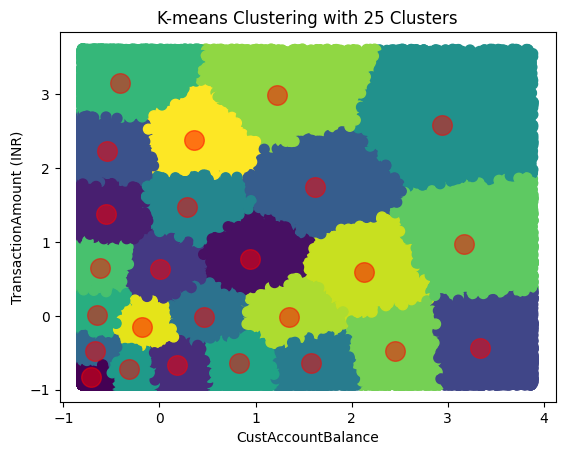

In [ ]:
# K-Means clustering
kmeans = KMeans(n_clusters=25, random_state=42)
kmeans.fit(features_scaled)

# The cluster labels for each data point
clusters = kmeans.labels_



y_kmeans = kmeans.predict(features_scaled);
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('K-means Clustering with 25 Clusters')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.show()

Upon inspection of this plot, it seems that the K-means algorithm has encountered some difficulties in cleanly separating the clusters. We see areas where multiple clusters are mixed together, such as the overlap between the blue, green, and purple clusters. This overlap could suggest that the data points in these regions are not easily separable into distinct groups based on the features provided.

The presence of small 'islands' of one cluster within the territory of another (for example, the yellow patches within the blue and purple areas) indicates that some data points are more similar to a centroid that's not geographically the nearest. This can happen in cases where the K-means algorithm's assumption of spherical clusters with similar sizes does not fit the actual distribution of data.

Additionally, we observe that some centroids (the red dots) are not centrally located within their clusters. In an ideal scenario, each centroid would be at the center of a cluster, indicating a clear mean of the cluster's features. The non-central positions of some centroids might suggest that the clusters are skewed or that there are outliers pulling the mean away from the center.

For more accurate interpretations, one would typically perform a more in-depth analysis, possibly including dimensionality reduction techniques like PCA to visualize the clusters in a reduced space, or using alternative clustering algorithms that may better capture the structure of the data, such as DBSCAN or Gaussian Mixture Models, if the assumption of spherical clusters made by K-means is not appropriate for the dataset.

***DBSCAN***

***DBSCAN plot choice 2***  
eps=0.1, min_sample=3

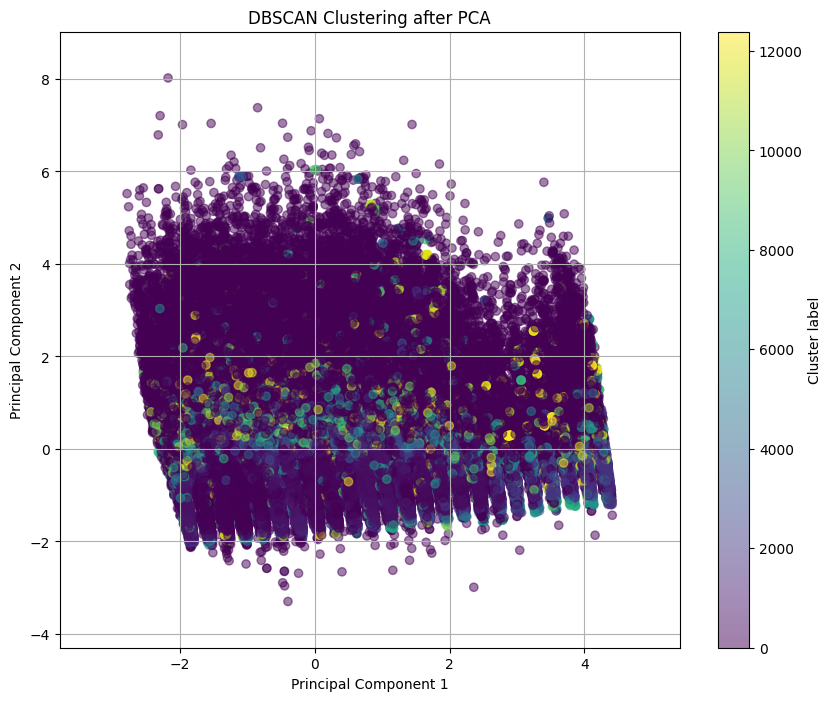

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Remove rows with NaN values
df_cleaned = df_clean.dropna()

# Select numerical features
features = df_cleaned.select_dtypes(include=[np.number])

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=3)
clusters_dbscan = dbscan.fit_predict(features_scaled)

# Adding the cluster labels to your cleaned DataFrame
df_cleaned['cluster_dbscan'] = clusters_dbscan

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters_dbscan, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster label')
plt.grid(True)

# Enhance visualization by adjusting limits and adding annotations if necessary
plt.xlim([features_pca[:, 0].min() - 1, features_pca[:, 0].max() + 1])
plt.ylim([features_pca[:, 1].min() - 1, features_pca[:, 1].max() + 1])

plt.show()


The graph displays the results of DBSCAN clustering applied to data that has undergone Principal Component Analysis (PCA). DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions.

PCA is a dimensionality reduction technique that transforms the data into a new coordinate system, with the axes—called principal components—ordered by the amount of variance they capture from the data. In this graph, we see the first two principal components on the x-axis (Principal Component 1) and the y-axis (Principal Component 2).

The colors of the points indicate different clusters found by DBSCAN, with the color scale reflecting the cluster label assigned to each point. The clusters are not as clearly distinct as you might see with K-means, because DBSCAN does not force every point into a cluster; it allows for the possibility of noise, which is represented by points that are not assigned to any cluster.

A noticeable feature of this plot is that many data points are concentrated along certain horizontal lines. This could be an artifact of the PCA transformation, or it might reflect some intrinsic property of the original data. Without more context, it's hard to say why this pattern appears.

The majority of data points are colored with the darker end of the spectrum, suggesting that DBSCAN may have identified these points as belonging to one large cluster or possibly as noise (it depends on the labeling convention used). The lighter-colored points indicate separate, smaller clusters. The distribution and size of clusters suggest that there might be some underlying structure in the data, but the clusters are not as well-separated as might be desired for clear categorization.

Overall, this visualization demonstrates the utility of PCA for reducing the dimensions of data so that clustering algorithms like DBSCAN can be applied effectively. It also highlights DBSCAN's ability to find arbitrary-shaped clusters and to identify outliers, which are points that do not fit well into any cluster. For a more comprehensive analysis, one would typically look at the DBSCAN parameters (like epsilon and min_samples) that led to this clustering result and may consider tuning them or using additional domain knowledge to better interpret the clusters.

***GMM***  
this one is after pca

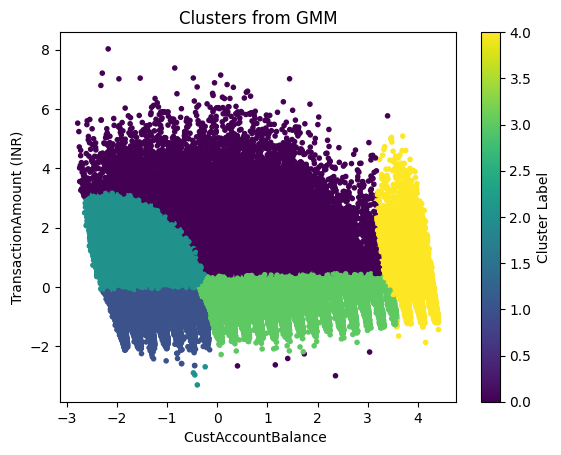

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Remove rows with NaN values
df_cleaned = df_clean.dropna()

# Select numerical features
features = df_cleaned.select_dtypes(include=[np.number])

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

from sklearn.mixture import GaussianMixture

# Assuming 'features_scaled' is still available from before
# Instantiate and fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(features_pca)

# Predict the cluster for each data point
clusters_gmm = gmm.predict(features_pca)

# Probabilities of each data point to belong to each cluster
probs_gmm = gmm.predict_proba(features_pca)

# Adding the cluster labels to your original DataFrame
df_cleaned['cluster_gmm'] = clusters_gmm

import matplotlib.pyplot as plt

# Assume we are plotting the first two features for a 2D representation
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters_gmm, cmap='viridis', marker='.')
plt.title('Clusters from GMM')
plt.xlabel('CustAccountBalance ')
plt.ylabel('TransactionAmount (INR)')
plt.colorbar(label='Cluster Label')
plt.show()

The graph presents results from clustering using a Gaussian Mixture Model (GMM). GMM is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.

The graph shows a scatter plot where each dot represents a data point in the space defined by two features, labeled 'CustAccountBalance' on the x-axis and 'TransactionAmount (INR)' on the y-axis. The color of each point corresponds to the cluster that the GMM algorithm has assigned it to, as indicated by the color bar on the right, which maps colors to cluster labels.

GMM is especially useful for identifying clusters that are not necessarily spherical and can have different variances. This capability is evident in the plot where we see that clusters appear to have different shapes and densities:

- The yellow cluster on the right appears to have a fairly elongated shape, stretching along the 'First Feature' axis.
- The purple cluster at the top of the plot is more diffuse, spreading out over a large range of the 'Second Feature'.
- The blue and green clusters at the bottom seem more compact and denser than the others.

These characteristics suggest that the underlying data distributions have different variances and possibly different covariance structures, which GMM can accommodate. This is in contrast to K-means, which assumes that clusters are spherical and have similar variances.

The GMM algorithm also provides soft clustering, which means that it gives not just the assignments of points to clusters, but also the probabilities for each data point of belonging to each cluster. This probabilistic cluster assignment is not depicted directly in this type of plot, but it is an important feature that allows for more nuanced interpretations of the data.

***Hierarchical Clustering***

For Hierarchical Clustering and Spectral Clustering, we will use subsample of entire dataset with n = 10000 to reduce the use of memory. So the diagram will be different comparing with previous one when every time run the code.

In [ ]:
# Hierarchical Clustering
df_cleaned = df_clean.dropna()
df_subsample = df_cleaned.sample(n=10000)

# Selecting numerical columns (assuming the dataset contains non-numerical columns)
numerical_df = df_subsample.select_dtypes(include=[float, int])

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(numerical_df)

# PCA to reduce dimensionality while retaining 95% of the variance
pca = PCA(n_components=0.95)
features_reduced = pca.fit_transform(features_scaled)

# Display basic information about the reduced features
print("Original number of features:", numerical_df.shape)
print("Reduced number of features:", features_reduced.shape)

agglomerative = AgglomerativeClustering(n_clusters=5)  # Adjust number of clusters as needed
clusters_agglo = agglomerative.fit_predict(features_reduced)
#df['cluster_agglo'] = clusters_agglo

# Optionally calculate silhouette score to evaluate clustering quality
silhouette_agglo = silhouette_score(features_reduced, clusters_agglo)
print("Silhouette Score for Agglomerative Clustering:", silhouette_agglo)


Original number of features: (10000, 5)
Reduced number of features: (10000, 4)
Silhouette Score for Agglomerative Clustering: 0.250379082972156


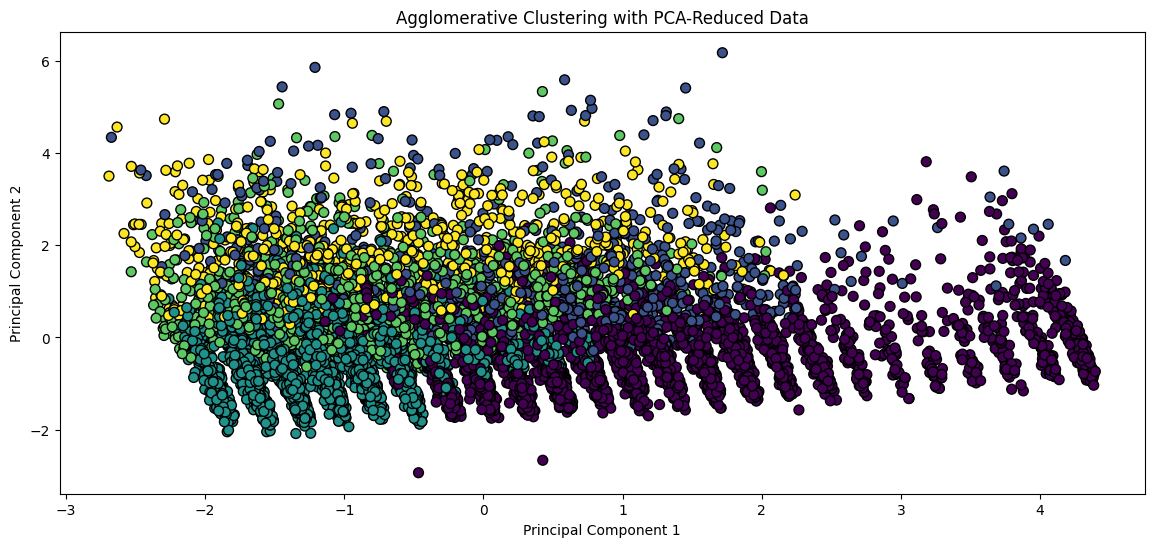

In [ ]:
import matplotlib.pyplot as plt

# Plot for Agglomerative Clustering
plt.figure(figsize=(14,6))
plt.scatter(features_reduced[:, 0], features_reduced[:, 1], c=clusters_agglo, cmap='viridis', edgecolor='k', s=50)
plt.title('Agglomerative Clustering with PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


The provided image appears to be a scatter plot showing the results of agglomerative clustering on a dataset that has been processed with Principal Component Analysis (PCA). Here's a comprehensive interpretation of what the graph illustrates:

1. **PCA-Reduced Data**: The x-axis and y-axis represent the first two principal components, which are the results of PCA. This technique reduces the dimensionality of the data, typically retaining the components that capture the most variance. The two axes show the new feature space with reduced dimensions where each point is a data sample.

2. **Agglomerative Clustering**: This hierarchical clustering method builds clusters step by step by merging the closest pairs of clusters. On a scatter plot like this, the points that are closer together in the PCA-reduced space are typically grouped into the same cluster. The different colors represent different clusters as identified by the algorithm.

3. **Clusters Characteristics**: The clusters seem to spread along both principal components, suggesting that the variance captured by PCA contains meaningful information for clustering.

4. **Outliers and Spread**: Some points are scattered far from the main clusters, which could be considered outliers. Their presence could affect the clustering process, particularly if these points are significantly different from the others.

This graph is useful for visualizing the natural groupings in the data after reducing the complexity with PCA. Each cluster might represent different underlying phenomena or types of behavior within the dataset, and understanding the original variables that contribute to the principal components would be crucial for interpreting these clusters in a real-world context.

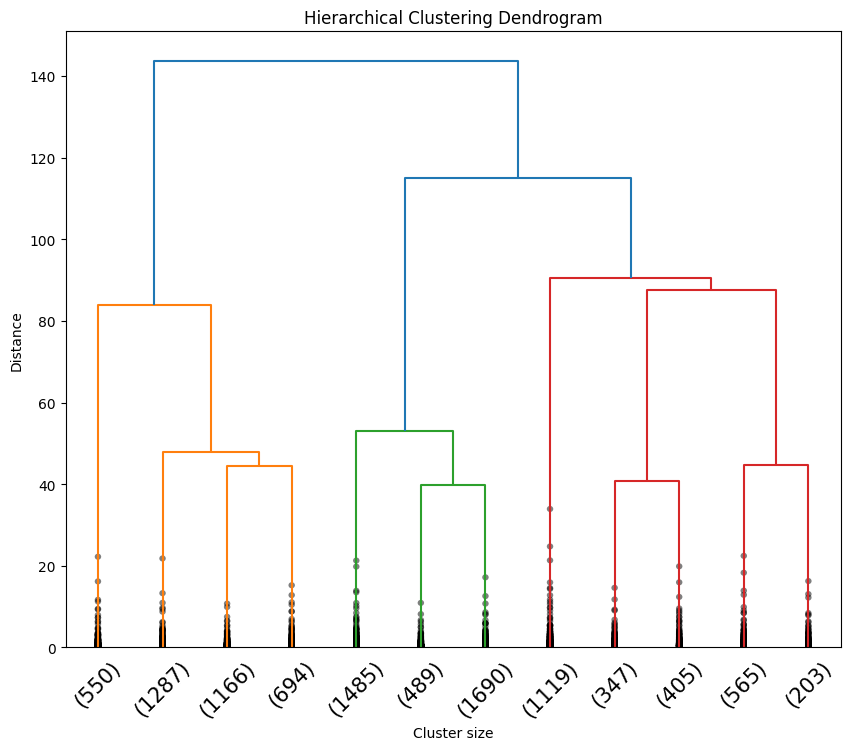

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
# Generating the linkage matrix
# Here, 'ward' method is used which minimizes the variance of clusters being merged.
Z = linkage(features_reduced, method='ward')
# Plotting the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()


The provided image is a dendrogram, which is a visual representation of the hierarchical clustering process. Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. The process involves creating clusters that have a predetermined ordering from top to bottom. Clusters are formed by merging or splitting them successively, which can be visualized in the form of a tree structure called a dendrogram.

In the dendrogram, the y-axis represents the distance or dissimilarity between clusters, where the 'distance' can refer to the Euclidean distance or another distance metric used by the clustering algorithm. The x-axis has labels indicating the size of the clusters at the points where the tree is cut.

Here's how to read this dendrogram:

1. **Leaves of the Tree**: The bottom of the dendrogram (the leaves) represents individual data points or clusters of a single element. As you move up the tree, these leaves begin to merge.

2. **Merges**: Each horizontal line indicates a merge between two clusters or data points. The height of the horizontal line shows the distance at which the two clusters were joined. A higher line means that clusters are less similar to each other.

3. **Cluster Size**: The numbers at the bottom indicate the number of data points in the cluster at the point where the dendrogram is cut horizontally. For instance, '(407)' means there is a cluster consisting of 407 data points.

4. **Color Coding**: The colors (blue, orange, green, red) may represent the sequence of cluster formations or might be arbitrary. Sometimes colors are used to indicate different clusters at a particular threshold.

5. **Selecting the Number of Clusters**: By cutting the dendrogram at a specific height, you determine the number of clusters. For example, cutting it at a height of 70 might yield six clusters, as suggested by the color coding.

Interpreting this dendrogram suggests several clusters of varying sizes, with the largest distance merge happening above the 120 mark on the y-axis, indicating a significant dissimilarity between two major clusters in this hierarchy.

***Spectral Clustering***

In [ ]:
# Spectral Clustering

spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', n_neighbors=10)  # Adjust parameters as needed
clusters_spectral = spectral.fit_predict(features_reduced)

# Optionally calculate silhouette score to evaluate clustering quality
silhouette_spectral = silhouette_score(features_reduced, clusters_spectral)
print("Silhouette Score for Spectral Clustering:", silhouette_spectral)

Silhouette Score for Spectral Clustering: 0.09823812353831379


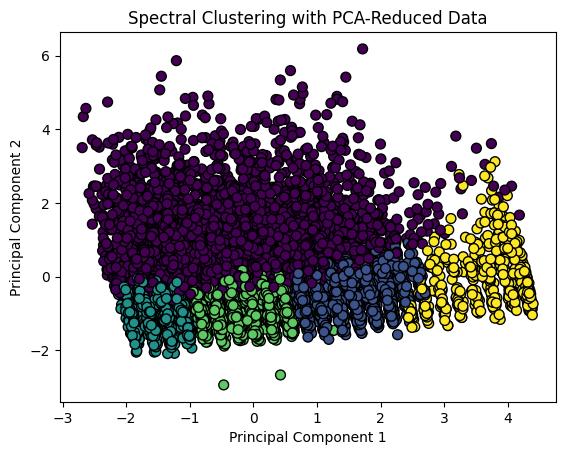

In [ ]:
# Plot for Spectral Clustering
plt.scatter(features_reduced[:, 0], features_reduced[:, 1], c=clusters_spectral, cmap='viridis', edgecolor='k', s=50)
plt.title('Spectral Clustering with PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The image shows a scatter plot resulting from spectral clustering applied to data that has been dimensionally reduced via PCA (Principal Component Analysis). Here's a detailed interpretation of what we're seeing:

1. **Spectral Clustering**: This clustering algorithm is used to group similar points together. It works well with data where the clusters are not necessarily spherical and might have complex shapes. It uses the eigenvalues of a similarity matrix of the data to reduce dimensions before clustering in fewer dimensions.

2. **Clusters**: The points are color-coded based on the cluster to which they've been assigned by the spectral clustering algorithm. The colors indicate that the algorithm has identified several distinct groups within the data.

3. **Cluster Shape and Distribution**: We can see that the clusters seem to be spread across both principal components, with no cluster being restricted to a narrow region of the PCA-reduced feature space. This suggests that the original high-dimensional data is fairly well-spread out across its principal axes of variance.

4. **Overlap and Boundaries**: There is some overlap between clusters in certain regions, particularly where blue and green points are close to each other. However, the yellow cluster seems to be more distinctly separated from the blue cluster, which might indicate a clearer distinction in the data's underlying structure for that cluster.

5. **Outliers**: There are a few points that are distant from the main body of data points, which could be considered outliers. These are the points that are farther away along the 'Principal Component 2' axis.

Interpreting this graph in a real-world context would depend on understanding the original features and what the principal components represent.